In [28]:
import os
from dotenv import load_dotenv
import huggingface_hub

# load env var huggingface token
load_dotenv(os.path.join("../", ".env"))
# login to the hub
huggingface_hub.login(token=os.getenv("HUGGINGFACE_TOKEN"))

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /home/matej/.cache/huggingface/token
Login successful


In [29]:
import datasets

voxpopuli = datasets.load_dataset("facebook/voxpopuli", "en", streaming=True, trust_remote_code=True)

In [30]:
voxpopuli_head = list(voxpopuli["train"].take(5))
SAMPLING_RATE = voxpopuli_head[0]["audio"]["sampling_rate"]
print(voxpopuli_head)

[{'audio_id': '20180418-0900-PLENARY-3-en_20180418-08:50:36_17', 'language': 0, 'audio': {'path': 'train_part_0/20180418-0900-PLENARY-3-en_20180418-08:50:36_17.wav', 'array': array([-0.00030518,  0.00119019,  0.00506592, ..., -0.00036621,
       -0.00027466, -0.00018311]), 'sampling_rate': 16000}, 'raw_text': 'If you do not address this problem, the ground is there for populist nationalist forces to go on growing all over Europe.', 'normalized_text': 'if you do not address this problem the ground is there for populist nationalist forces to go on growing all over europe.', 'gender': 'female', 'speaker_id': '124737', 'is_gold_transcript': True, 'accent': 'None'}, {'audio_id': '20170614-0900-PLENARY-5-en_20170614-10:03:08_5', 'language': 0, 'audio': {'path': 'train_part_0/20170614-0900-PLENARY-5-en_20170614-10:03:08_5.wav', 'array': array([-0.00036621, -0.00030518, -0.00042725, ...,  0.00012207,
        0.00119019,  0.00027466]), 'sampling_rate': 16000}, 'raw_text': 'they attacked and rem

In [ ]:
from transformers import AutoTokenizer, AutoFeatureExtractor, SpeechEncoderDecoderModel

encoder_id = "facebook/wav2vec2-base-960h"  # acoustic model encoder
decoder_id = "facebook/bart-base"  # text decoder

feature_extractor = AutoFeatureExtractor.from_pretrained(encoder_id)
tokenizer = AutoTokenizer.from_pretrained(decoder_id)

model = SpeechEncoderDecoderModel.from_encoder_decoder_pretrained(
    encoder_id, decoder_id, encoder_add_adapter=True
)
model.config.encoder.feat_proj_dropout = 0.0
model.config.encoder.mask_time_prob = 0.0
model.config.decoder_start_token_id = model.decoder.config.bos_token_id
model.config.pad_token_id = model.decoder.config.pad_token_id
model.config.eos_token_id = model.decoder.config.eos_token_id
model.config.max_length = 128
model.config.encoder.layerdrop = 0.0
model.config.use_cache = False
model.config.processor_class = "Wav2Vec2Processor"


input_values = feature_extractor(
    voxpopuli_head[0]["audio"]["array"], return_tensors="pt", sampling_rate=SAMPLING_RATE
).input_values

generated_ids = model.generate(input_values, decoder_start_token_id=tokenizer.cls_token_id, )
generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
print(generated_text)

# # load its corresponding transcription and tokenize to generate labels
# labels = tokenizer(voxpopuli_head[0]["text"], return_tensors="pt").input_ids

In [ ]:
# Load trained model 

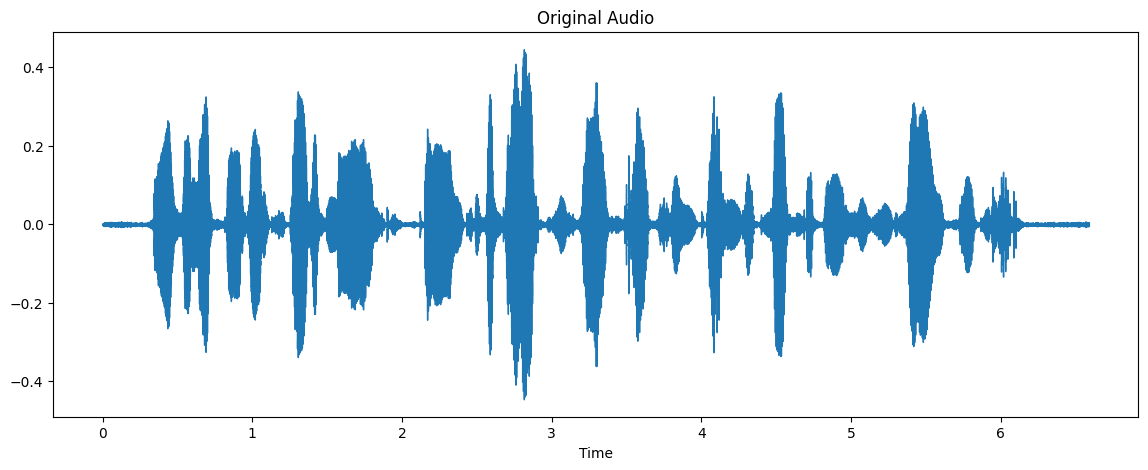

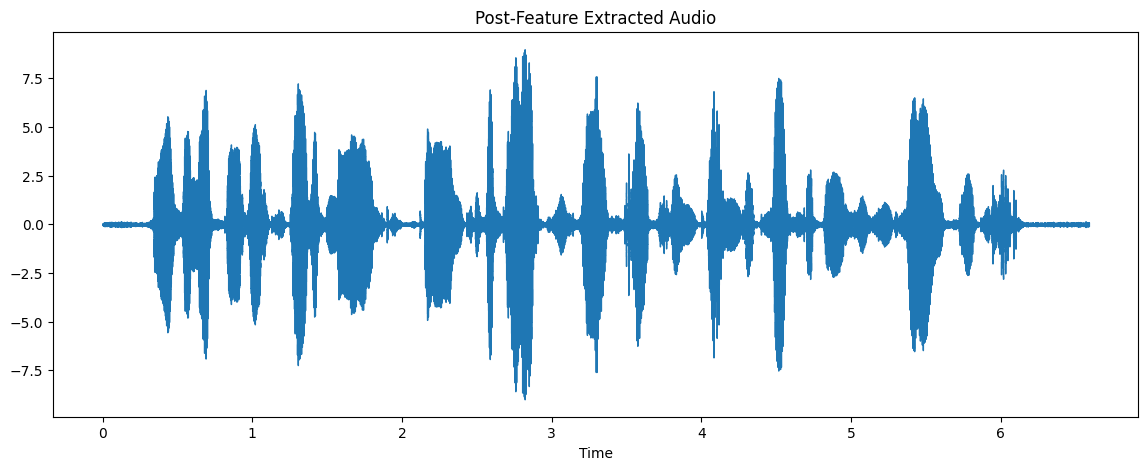

In [4]:
# FOR DEBUGGING TO INSPECT THE AUDIO
import matplotlib.pyplot as plt
import librosa.display

# Load and display the original audio
audio_orig, sr_orig = librosa.load("../tmp/debug/2277-149896-0000_orig.mp3")
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio_orig, sr=sr_orig)
plt.title("Original Audio")
plt.show()

# Load and display the post-feature extracted audio
audio_post, sr_post = librosa.load("../tmp/debug/2277-149896-0000.mp3")
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio_post, sr=sr_post)
plt.title("Post-Feature Extracted Audio")
plt.show()